In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [3]:
(train_input, train_target),(test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [4]:
train_scaled = train_input / 255

In [5]:
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2, random_state=42)

In [6]:
# Model 함수 구현
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    if a_layer:
        model.add(a_layer)
    model.add(keras.layers.Dense(10, activation='softmax'))
    return model

In [7]:
model = model_fn()
model.summary()

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


2023-02-28 17:21:29.447120: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-02-28 17:21:29.447260: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [8]:
# 훈련 및 과정에 대한 history보기
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=1)

Epoch 1/5


2023-02-28 17:23:10.031220: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2023-02-28 17:23:10.176631: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 8s 5ms/step - loss: 0.5349 - accuracy: 0.8108
Epoch 2/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3938 - accuracy: 0.8587
Epoch 3/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3566 - accuracy: 0.8722
Epoch 4/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3353 - accuracy: 0.8787
Epoch 5/5
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3197 - accuracy: 0.8855


In [9]:
history.history.keys()

dict_keys(['loss', 'accuracy'])

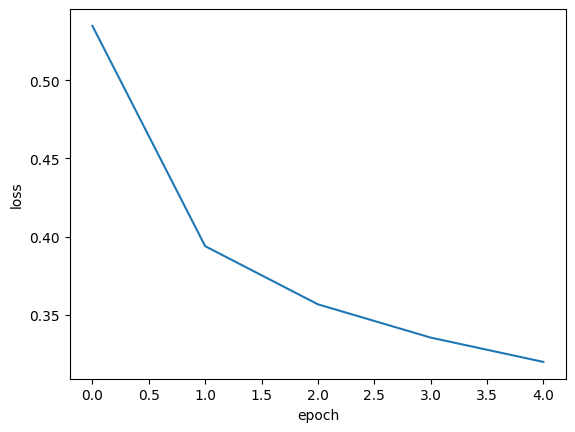

In [12]:
# history loss의 시각화
import matplotlib.pyplot as plt

plt. plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

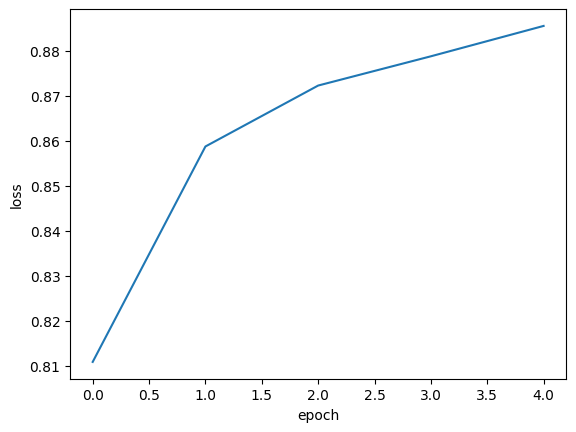

In [14]:
# history accuracy의 시각화

plt. plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [16]:
# 훈련 및 과정에 대한 history보기
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1)

Epoch 1/20
   9/1500 [..............................] - ETA: 9s - loss: 1.8575 - accuracy: 0.3646      

2023-02-28 17:30:14.704487: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 8s 5ms/step - loss: 0.5305 - accuracy: 0.8131
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3893 - accuracy: 0.8595
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3554 - accuracy: 0.8718
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3324 - accuracy: 0.8814
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3192 - accuracy: 0.8867
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3095 - accuracy: 0.8904
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2986 - accuracy: 0.8929
Epoch 8/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2889 - accuracy: 0.8978
Epoch 9/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2821 - accuracy: 0.9003
Epoch 10/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.2784 - accurac

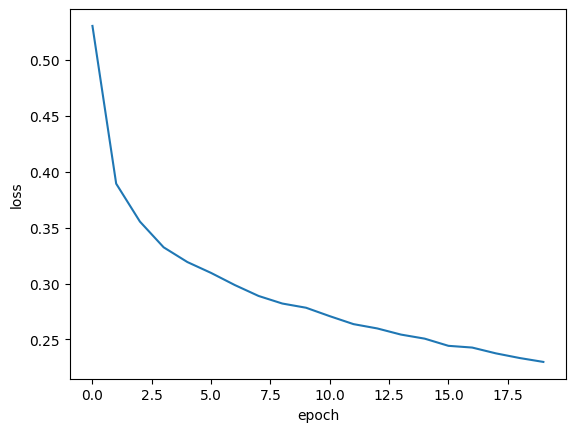

In [17]:
plt. plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

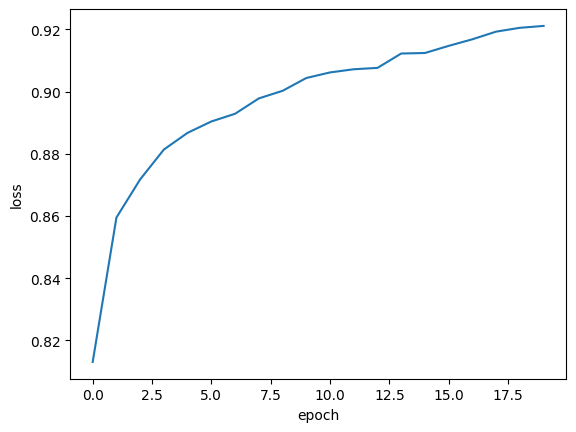

In [18]:
plt. plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

---
### 검증 손실
: 검증세트에 대한 정확도를 파악하기 위해 Validation data를 사용한다.

In [19]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target)
                    )

Epoch 1/20
   9/1500 [..............................] - ETA: 9s - loss: 1.9233 - accuracy: 0.3924  

2023-02-28 17:34:15.412646: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1494/1500 [============================>.] - ETA: 0s - loss: 0.5285 - accuracy: 0.8146

2023-02-28 17:34:23.819263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 10s 6ms/step - loss: 0.5277 - accuracy: 0.8149 - val_loss: 0.4042 - val_accuracy: 0.8594
Epoch 2/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3877 - accuracy: 0.8597 - val_loss: 0.3795 - val_accuracy: 0.8647
Epoch 3/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3543 - accuracy: 0.8733 - val_loss: 0.3558 - val_accuracy: 0.8738
Epoch 4/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3329 - accuracy: 0.8811 - val_loss: 0.3481 - val_accuracy: 0.8793
Epoch 5/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3191 - accuracy: 0.8867 - val_loss: 0.3500 - val_accuracy: 0.8814
Epoch 6/20
1500/1500 [==============================] - 10s 6ms/step - loss: 0.3077 - accuracy: 0.8913 - val_loss: 0.3585 - val_accuracy: 0.8752
Epoch 7/20
1500/1500 [==============================] - 9s 6ms/step - loss: 0.2984 - accuracy: 0.8944 - val_loss: 0.3955 - val_accuracy: 0.8718
E

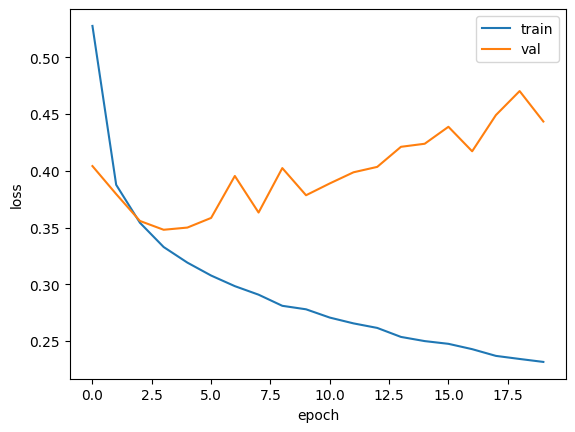

In [20]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [21]:
model = model_fn()
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target)
                    )

Epoch 1/20
  23/1500 [..............................] - ETA: 7s - loss: 1.6502 - accuracy: 0.4633

2023-02-28 17:39:29.006148: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1495/1500 [============================>.] - ETA: 0s - loss: 0.5302 - accuracy: 0.8147

2023-02-28 17:39:35.831033: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 8s 5ms/step - loss: 0.5303 - accuracy: 0.8147 - val_loss: 0.4252 - val_accuracy: 0.8484
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3925 - accuracy: 0.8596 - val_loss: 0.3977 - val_accuracy: 0.8570
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3521 - accuracy: 0.8718 - val_loss: 0.3798 - val_accuracy: 0.8621
Epoch 4/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3259 - accuracy: 0.8811 - val_loss: 0.3645 - val_accuracy: 0.8683
Epoch 5/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.3082 - accuracy: 0.8866 - val_loss: 0.3357 - val_accuracy: 0.8798
Epoch 6/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2913 - accuracy: 0.8918 - val_loss: 0.3302 - val_accuracy: 0.8812
Epoch 7/20
1500/1500 [==============================] - 7s 5ms/step - loss: 0.2779 - accuracy: 0.8977 - val_loss: 0.3380 - val_accuracy: 0.8792
Epo

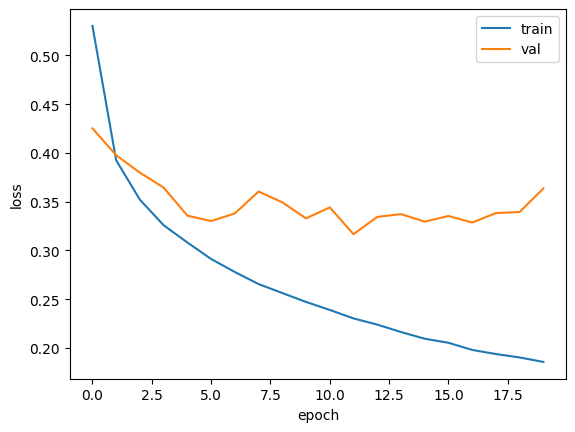

In [22]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [23]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_4 (Flatten)         (None, 784)               0         
                                                                 
 dense_8 (Dense)             (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_9 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target)
                    )

Epoch 1/20
   1/1500 [..............................] - ETA: 6:32 - loss: 2.6838 - accuracy: 0.0938

2023-02-28 17:45:24.711112: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1498/1500 [============================>.] - ETA: 0s - loss: 0.5816 - accuracy: 0.7965

2023-02-28 17:45:32.267616: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 9s 6ms/step - loss: 0.5813 - accuracy: 0.7966 - val_loss: 0.4427 - val_accuracy: 0.8421
Epoch 2/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4268 - accuracy: 0.8456 - val_loss: 0.3887 - val_accuracy: 0.8568
Epoch 3/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3876 - accuracy: 0.8599 - val_loss: 0.3710 - val_accuracy: 0.8630
Epoch 4/20
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3646 - accuracy: 0.8667 - val_loss: 0.3592 - val_accuracy: 0.8681
Epoch 5/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3498 - accuracy: 0.8723 - val_loss: 0.3485 - val_accuracy: 0.8733
Epoch 6/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3375 - accuracy: 0.8754 - val_loss: 0.3434 - val_accuracy: 0.8767
Epoch 7/20
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3259 - accuracy: 0.8797 - val_loss: 0.3419 - val_accuracy: 0.8776
Epo

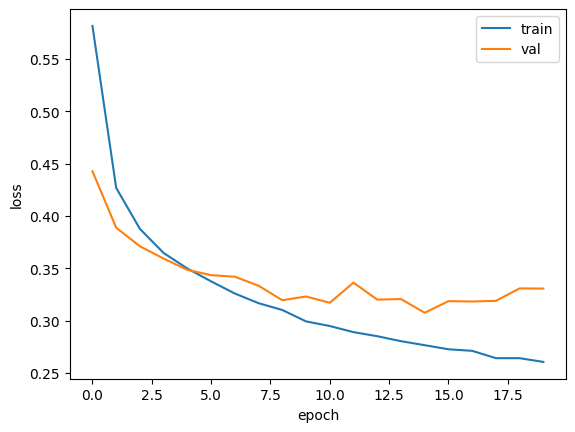

In [25]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [28]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=1,
                    validation_data=(val_scaled, val_target)
                    )

Epoch 1/10
  19/1500 [..............................] - ETA: 8s - loss: 1.8187 - accuracy: 0.3849

2023-02-28 17:50:31.231964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1489/1500 [============================>.] - ETA: 0s - loss: 0.5810 - accuracy: 0.7965

2023-02-28 17:50:38.721680: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 9s 6ms/step - loss: 0.5798 - accuracy: 0.7969 - val_loss: 0.4302 - val_accuracy: 0.8472
Epoch 2/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.4279 - accuracy: 0.8459 - val_loss: 0.3846 - val_accuracy: 0.8633
Epoch 3/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3899 - accuracy: 0.8585 - val_loss: 0.3742 - val_accuracy: 0.8651
Epoch 4/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3675 - accuracy: 0.8655 - val_loss: 0.3472 - val_accuracy: 0.8748
Epoch 5/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3502 - accuracy: 0.8721 - val_loss: 0.3433 - val_accuracy: 0.8739
Epoch 6/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3369 - accuracy: 0.8764 - val_loss: 0.3408 - val_accuracy: 0.8781
Epoch 7/10
1500/1500 [==============================] - 9s 6ms/step - loss: 0.3276 - accuracy: 0.8790 - val_loss: 0.3386 - val_accuracy: 0.8779
Epo

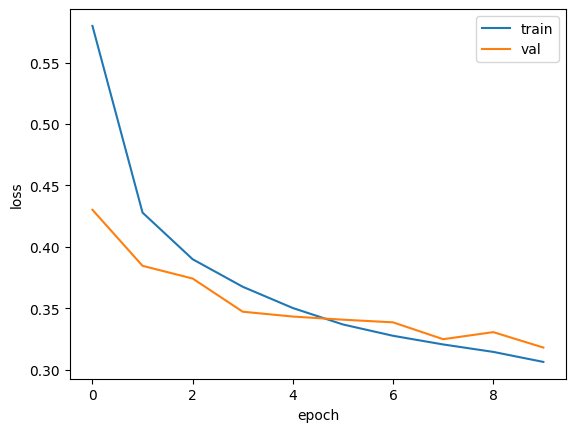

In [29]:
# 시각화
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

---
### 모델 저장과 복원
- hdf5 format

In [30]:
# model의 전체를 저장
model.save("../Data/model_whole.h5")

In [31]:
# 복원
model = keras.models.load_model("../Data/model_whole.h5")
model.evaluate(val_scaled, val_target)

 26/375 [=>............................] - ETA: 1s - loss: 0.2858 - accuracy: 0.8978

2023-02-28 17:52:06.568608: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 2s 4ms/step - loss: 0.3181 - accuracy: 0.8841


[0.31807881593704224, 0.8840833306312561]

---
## Callbacks
- 훈련수행시 손실값이 제일 작은 함수를 저장한다.

In [32]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
history = model.fit(train_scaled, train_target, epochs=10, verbose=1,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb]
                    )

Epoch 1/10
   9/1500 [..............................] - ETA: 9s - loss: 2.1308 - accuracy: 0.2049  

2023-02-28 17:54:23.429342: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1491/1500 [============================>.] - ETA: 0s - loss: 0.5832 - accuracy: 0.7961

2023-02-28 17:54:31.355006: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1500/1500 [==============================] - 9s 6ms/step - loss: 0.5827 - accuracy: 0.7963 - val_loss: 0.4254 - val_accuracy: 0.8447
Epoch 2/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.4295 - accuracy: 0.8474 - val_loss: 0.3955 - val_accuracy: 0.8520
Epoch 3/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3873 - accuracy: 0.8605 - val_loss: 0.3581 - val_accuracy: 0.8712
Epoch 4/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3687 - accuracy: 0.8656 - val_loss: 0.3619 - val_accuracy: 0.8698
Epoch 5/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3532 - accuracy: 0.8713 - val_loss: 0.3409 - val_accuracy: 0.8744
Epoch 6/10
1500/1500 [==============================] - 8s 5ms/step - loss: 0.3413 - accuracy: 0.8749 - val_loss: 0.3433 - val_accuracy: 0.8733
Epoch 7/10
1500/1500 [==============================] - 8s 6ms/step - loss: 0.3284 - accuracy: 0.8800 - val_loss: 0.3359 - val_accuracy: 0.8776
Epo

In [33]:
# 복원
model = keras.models.load_model("../Data/best-model.h5")
model.evaluate(val_scaled, val_target)

 25/375 [=>............................] - ETA: 1s - loss: 0.3165 - accuracy: 0.8925

2023-02-28 17:56:54.456348: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 2s 4ms/step - loss: 0.3484 - accuracy: 0.8737


[0.348398357629776, 0.8737499713897705]

### Early Stopping(조기종료)

In [36]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam' ,loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint("../Data/best-model.h5")
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

history = model.fit(train_scaled, train_target, epochs=10, verbose=1,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb]
                    )

KeyboardInterrupt: 

In [ ]:
# 몇번째 epoch에서 멈췄는가
early_stopping_cb.stopped_epoch